In [8]:
import os
import pandas as pd
import pyarrow.parquet as pq
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def merge_data(input_dir, output_file):
    # List all Parquet files in the directory
    parquet_files = [f for f in os.listdir(input_dir) if f.endswith('.parquet')]
  
    # Read and concatenate all Parquet files
    dataframes = [pd.read_parquet(os.path.join(input_dir, file)) for file in parquet_files]
    merged_df = pd.concat(dataframes, ignore_index=True)
    merged_df = merged_df[['date', 'ticker', 'adjustedClose']]
    merged_df['date'] = merged_df['date'].dt.date
    merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y%m%d')
    merged_pivot = merged_df.pivot_table(index='date', columns='ticker', values='adjustedClose')
  
    # Save the merged DataFrame to a Parquet file
    merged_pivot.to_parquet(output_file)
    print(f"Merged DataFrame saved to {output_file}")

In [5]:
merge_data(input_dir="C:/tcc_dsa/data/processed/prices_hist/5y", output_file="C:/tcc_dsa/data/processed/merged/merged_prices_5y.parquet")
merge_data(input_dir="C:/tcc_dsa/data/processed/prices_hist/10y", output_file="C:/tcc_dsa/data/processed/merged/merged_prices_10y.parquet")

Merged DataFrame saved to C:/tcc_dsa/data/processed/merged/merged_prices_5y.parquet
Merged DataFrame saved to C:/tcc_dsa/data/processed/merged/merged_prices_10y.parquet


In [6]:
hist_10y = pd.read_parquet("C:/tcc_dsa/data/processed/merged/merged_prices_10y.parquet")

<Axes: xlabel='date', ylabel='ABEV3'>

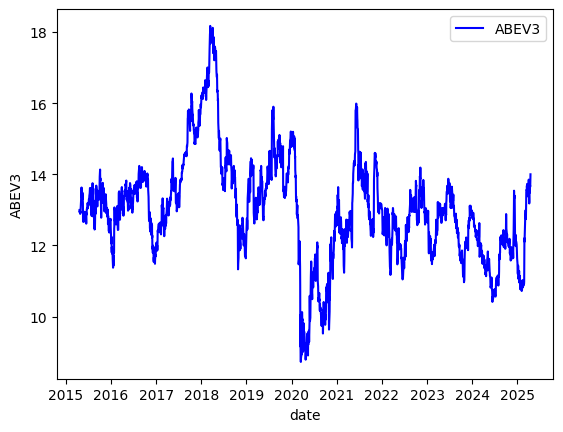

In [28]:
sns.lineplot(data=hist_10y, x= hist_10y.index, y= hist_10y['ABEV3'], label='ABEV3', color='blue')